# Linear Regression, Residual sum of squares

Loading required libraries.

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Creating data frame to store [data](https://www.statlearning.com/resources-python).

In [109]:
df = pd.read_csv("Credit.csv")
df

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,No,No,Yes,South,560
396,13.364,3838,296,5,65,17,No,No,No,East,480
397,57.872,4171,321,5,67,12,Yes,No,Yes,South,138
398,37.728,2525,192,1,44,13,No,No,Yes,South,0


Plot data.

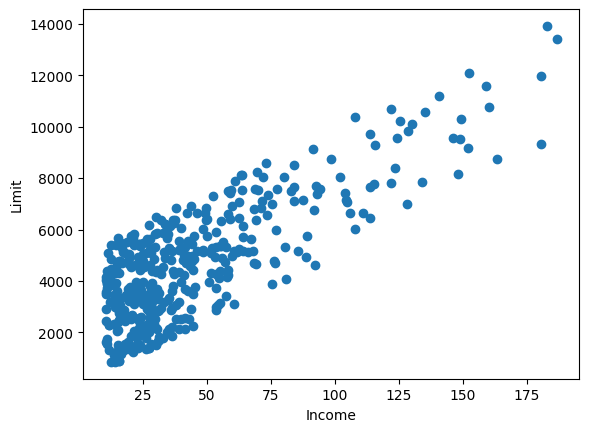

In [110]:
plt.scatter(df['Income'], df['Limit'])
plt.xlabel("Income")
plt.ylabel("Limit")
plt.show()

Observe that there is a positive relationship between ``income`` and ``limit``. Now let's try to fit a naive, average statistical model.

In [111]:
limit_mean = float(df[['Limit']].mean().iloc[0])

In [112]:
y_points = np.array([limit_mean,limit_mean])
x_points = np.array([df['Income'].min(),df['Income'].max()])

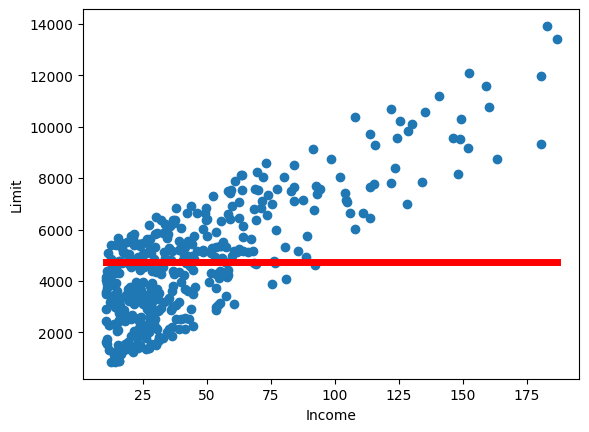

In [113]:

plt.scatter(df['Income'], df['Limit'])
plt.plot(x_points, y_points, color="red", linewidth=5)
plt.xlabel("Income")
plt.ylabel("Limit")
plt.show()

## Residual Sum of Squares

How to evaluate performance of the model? We can calculate **RSS** which stands for **residual sum of squares** and it is give by
$$
\text{RSS} := \sum (y-\hat{y})^2,
$$
where $y$ is the value of actual observation and $\hat{y}$ is the prediction of the model.

In case of average model, the prediction is the red line.

In [114]:
# Assume that arguments are both dataframes of the same shape
def rss(y_true, y_predicted):
    return np.dot(y_true-y_predicted, y_true-y_predicted)

In [115]:
true_independent_variable = np.array(df['Limit'])
prediction_of_model = np.array([limit_mean for i in range(400)])
average_rss = rss(true_independent_variable, prediction_of_model)
print("Residual sum of squares is", average_rss)

Residual sum of squares is 2125784985.9999998


## Linear regression

From the scatterplot one can reason that if the line was inclined then the number would be smaller. Let's follow this intuintion. Let's take the following model:
$$\hat{y} = w_0 + w_1 x,$$
where $x$ is the ``income`` value and $\hat{y}$ is the ``limit`` prediction. Now, we can use some calculus to minimize RSS:

$$RSS = \sum (y-\hat{y})^2
= \sum (y-w_0 + w_1 x)^2.$$

Calculate 
$$\frac{\partial RSS}{\partial w_0} = 0$$
$$\frac{\partial RSS}{\partial w_1} = 0$$

These equations find minimum because the function is quadratic in coefficents $w_1$ and $w_2$. This gives a system of equations in terms of $w_1$ and $w_2$ that can be solved.

As $w_1$ and $w_2$ were estimated from data we add ^ to get
$$\hat{w_1} = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum^n_{i=1}(x_i-\bar{x})^2}$$
$$\hat{w_0} = \bar{y}-w_1\bar{x}$$

Now, make this in the code

In [116]:
x_mean = float(df['Income'].mean())
y_mean = limit_mean

w_1 = np.dot(np.array(df['Income'])-x_mean,np.array(df['Limit']) - y_mean ) / np.dot(np.array(df['Income'])-x_mean,np.array(df['Income'])-x_mean)
w_0 = y_mean-w_1*x_mean

Define function that claculates linear regression and compare the result to RSS from average model...

In [117]:
def lin_regression(w_0, w_1, x ):
    return w_0+w_1*x

y_reg_predicted = np.array([lin_regression(w_0,w_1, x) for x in df['Income']])

reg_rss = rss(true_independent_variable, y_reg_predicted)
print("RSS for linear regression is", rss(true_independent_variable, y_reg_predicted))
print(average_rss > reg_rss)

RSS for linear regression is 792059109.1663245
True


Let's plot it to clearly see that simple regression is better...

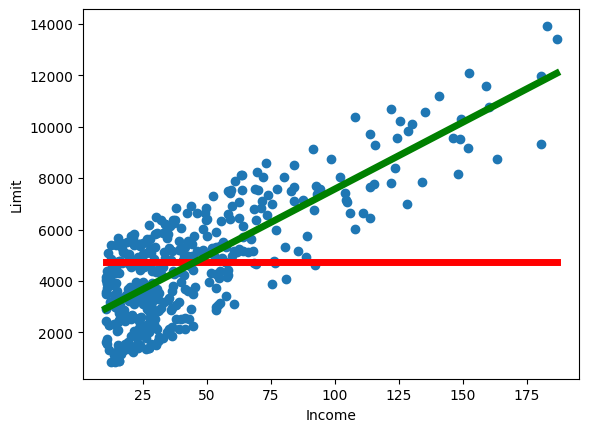

In [118]:
x_reg = np.linspace(df['Income'].min(),df['Income'].max(),2000)
y_reg = lin_regression(w_0, w_1, x_reg)

plt.scatter(df['Income'], df['Limit'])
plt.plot(x_points, y_points, color="red", linewidth=5)
plt.plot(x_reg, y_reg, color="green", linewidth=5)
plt.xlabel("Income")
plt.ylabel("Limit")
plt.show()


It would be cumbersome to remember equations for coefficents of linear regression. However we can use library ``scikit-learn`` that does all the calculations for us.

In [119]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression().fit(df[['Income']], df['Limit'])
y_sk_pred = regression.predict(df[['Income']])

reg_sk_rss = rss(true_independent_variable, y_sk_pred)
print(reg_rss)
print(reg_sk_rss)

print("They are almost identical!! Hence the curves should be indistinguishable...")

792059109.1663245
792059109.1663244
They are almost identical!! Hence the curves should be indistinguishable...


Let's plot ``scikit-regression``...

/home/adrian/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


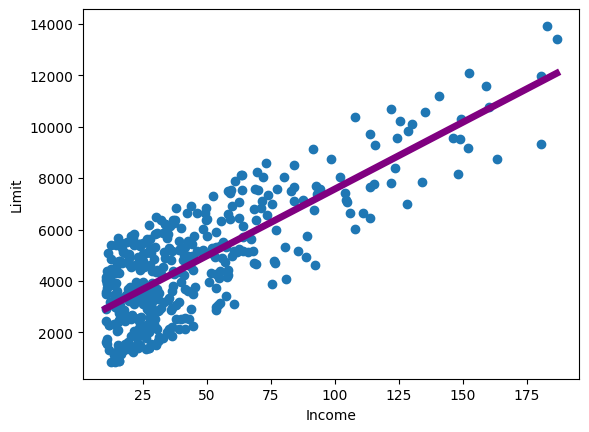

In [120]:
x_sk_reg = pd.DataFrame(np.linspace(df['Income'].min(),df['Income'].max(),2000))
y_sk_reg = regression.predict(x_sk_reg)

plt.scatter(df['Income'], df['Limit'])
plt.plot(x_sk_reg, y_sk_reg, color="purple", linewidth=5)
plt.xlabel("Income")
plt.ylabel("Limit")
plt.show()

## Conclusion
In this jupyter notebook, I covered the most foundational topics in Supervised Statistical learning: simple linear regression, and residual sum of squares. I also covered formula for coefficents of simple linear regression and compared it to the model given by standard library.